<a href="https://colab.research.google.com/github/21700185-kimtaehong/Int_AI_sample/blob/main/0404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
input_img = Input(shape=(784,)) #784 = 28x28
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)

In [16]:
#need to re-define input layer for decoder input
encoded_input = Input(shape=(encoding_dim,))
decoded = Dense(784, activation='sigmoid')(encoded_input)
decoder = Model(encoded_input, decoded)

outputs = decoder(encoder(input_img))
autoencoder = Model(input_img, outputs)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# float32 / 255 : 값을 0~1로 만들기
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [18]:
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.2764 - val_loss: 0.1894
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1706 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1446 - val_loss: 0.1336
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1282 - val_loss: 0.1207
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1176 - val_loss: 0.1122
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1104 - val_loss: 0.1062
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1055 - val_loss: 0.1022
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1020 - val_loss: 0.0992
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0994 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0975 - val_loss: 0.0954

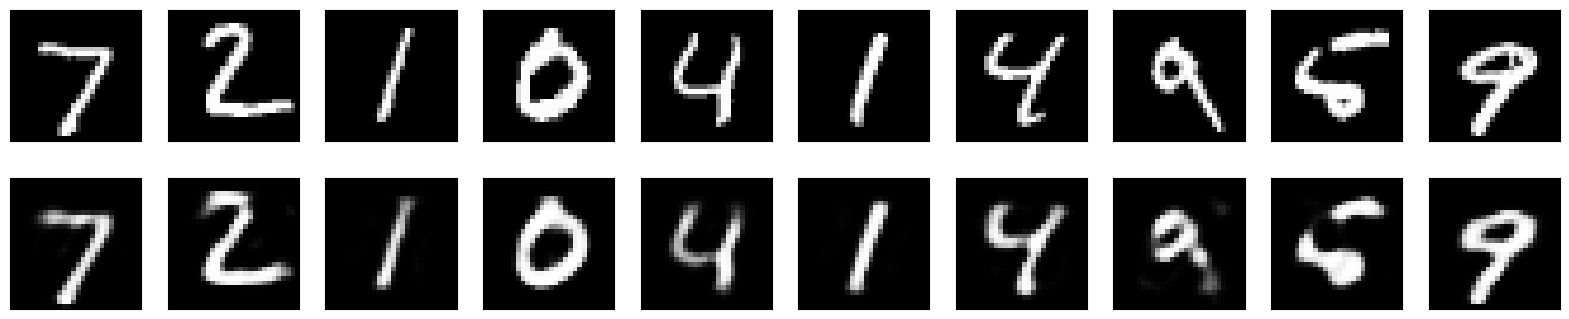

In [19]:
import matplotlib.pyplot as plt

n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()


In [22]:
import tensorflow as tf

from tensorflow.python.keras import layers
# from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Model

def preprocess(array): 
  """ 
  Normalizes the supplied array and reshapes it into the appropriate format. 
  """ 
  
  array = array.astype("float32") / 255.0
  array = np.reshape(array, (len(array), 28, 28, 1))
  return array

In [23]:
(train_data, _), (test_data, _) = mnist.load_data()
# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [24]:
input = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        9248  

In [25]:
autoencoder.fit(
  x=train_data,
  y=train_data,
  epochs=50,
  batch_size=128,
  shuffle=True,
  validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1374 - val_loss: 0.0729
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0716 - val_loss: 0.0697
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0695 - val_loss: 0.0682
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0683 - val_loss: 0.0673
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0675 - val_loss: 0.0667
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0669 - val_loss: 0.0662
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0664 - val_loss: 0.0658
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0661 - val_loss: 0.0654
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0657 - val_loss: 0.0652
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0655 - val_loss: 0.0650

In [26]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

array([[[[1.42769377e-05],
         [8.09128142e-06],
         [8.16780599e-08],
         ...,
         [1.51159028e-07],
         [4.18593249e-09],
         [3.63055938e-06]],

        [[3.99261324e-07],
         [1.94084619e-15],
         [2.48987241e-15],
         ...,
         [1.09726228e-17],
         [1.37305086e-16],
         [1.92134836e-10]],

        [[1.13744214e-08],
         [2.32717918e-17],
         [8.97676046e-19],
         ...,
         [1.39862510e-18],
         [3.01578822e-18],
         [1.37765105e-10]],

        ...,

        [[2.98828446e-08],
         [6.51415294e-16],
         [2.12608023e-15],
         ...,
         [8.85305284e-13],
         [9.56668338e-13],
         [1.76748038e-08]],

        [[8.66459970e-09],
         [8.74793625e-18],
         [1.53295737e-18],
         ...,
         [2.30591882e-16],
         [4.26134335e-16],
         [4.66889016e-09]],

        [[1.43124225e-06],
         [6.41402990e-12],
         [9.78888194e-13],
         ...,
 

In [27]:
def noise(array):
  """
  Adds random noise to each image in the supplied array.
  """

  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=array.shape
  )

  return np.clip(noisy_array, 0.0, 1.0)

In [28]:
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

array([[[[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [1.30516045e-01],
         [4.70965011e-01],
         [3.45480826e-01]],

        [[0.00000000e+00],
         [7.85518563e-01],
         [1.29499711e-01],
         ...,
         [0.00000000e+00],
         [1.54392756e-01],
         [0.00000000e+00]],

        [[3.23221744e-01],
         [6.57676002e-02],
         [0.00000000e+00],
         ...,
         [3.04455311e-01],
         [0.00000000e+00],
         [0.00000000e+00]],

        ...,

        [[1.94735821e-03],
         [4.57756193e-02],
         [7.16309720e-01],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [2.80037462e-01]],

        [[4.48611808e-01],
         [4.39186503e-01],
         [2.81605437e-01],
         ...,
         [9.41639252e-01],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[1.66626425e-01],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
 

In [ ]:
autoencoder.fit(
  x=noisy_train_data,
  y=train_data,
  epochs=100,
  batch_size=128,
  shuffle=True,
  validation_data=(noisy_test_data, test_data),
) 

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0999 - val_loss: 0.0930
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0925 - val_loss: 0.0910
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0910 - val_loss: 0.0899
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0900 - val_loss: 0.0891
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0893 - val_loss: 0.0885
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0887 - val_loss: 0.0880
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0883 - val_loss: 0.0877
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0879 - val_loss: 0.0871
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0876 - val_loss: 0.0869
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0873 - val_lo

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)